 
# <font color='darkblue'>Income Prediction</font>
## <font color='darkblue'>Author: Marcos Ikino</font>


### Introduction
This study aims to predict whether income exceeds $50K/yr, through the construction of a predictive model from the Census Income data set (http://archive.ics.uci.edu/ml/datasets/Census+Income), based on census data. 

The study is divided into 3 parts; part 1 will work on loading, cleaning, and transforming the data, so that in part 2 the exploratory data analysis through the visualization, until, in the last part, it is possible to elaborate the predictive model for forecasting if income exceeds $50K/yr or not (income variable).

#### Attributes Information:

income: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# 

### Part 1 - Loading, cleaning, and transforming the data

#### 1.1 - Libraries import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 1.2 - Loading the data

In [2]:
df = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                                      'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                                      'hours-per-week', 'native-country', 'income'], na_values=('\?', ''))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### 1.3 - Detecting and removing NaN and duplicated values

From the 'workclass', 'occupation' and 'native-country' columns, the special character (?) was transformed to a NaN value, and after that, it was opted to remove them to adjust better the data and avoid misclassification. Also, the duplicated values were removed.

In [4]:
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']] \
.apply(lambda x: x.replace('\?', '', regex=True))

df = df.replace(r'^\s*$', np.NaN, regex=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Removing the NA values

In [6]:
df = df.dropna()

##### Removing the duplicated values

In [7]:
df.duplicated().sum()

23

In [8]:
df = df[~df.duplicated()]
len(df)

30139

#### 1.4 - Grouping parameters of categorical variables
Grouping parameters of categorical variables with high levels of granularity, according to the similarity and characteristics between the parameters. Apart from this grouping procedure, specifically, the 'relationship' and 'native-country'variables will be removed (see 1.4.5 and 1.4.6 sections).

##### 1.4.1 - Workclass


In [9]:
df['workclass'].value_counts()

 Private             22264
 Self-emp-not-inc     2498
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [10]:
idx = df['workclass'].value_counts().index[:]
idx

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object')

In [11]:
lst1 = [2,3,5]
lst2 = [6]

df['workclass'] = np.where(df['workclass'].isin(idx[lst1]), 'Govern', df['workclass'])
df['workclass'] = np.where(df['workclass'].isin(idx[lst2]), 'Private', df['workclass'])
df.loc[df['workclass'].str.contains('Private'), 'workclass'] = 'Private'

In [12]:
df.workclass.value_counts()

Private              22278
Govern                4289
 Self-emp-not-inc     2498
 Self-emp-inc         1074
Name: workclass, dtype: int64

##### 1.4.2 - Occupation


In [13]:
df.occupation.value_counts()

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3719
 Sales                3584
 Other-service        3209
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df.loc[df['occupation'].str.contains('Armed-Forces'), 'occupation'] = 'Other-service'
df.loc[df['occupation'].str.contains('Priv-house-serv'), 'occupation'] = 'Other-service'
df.loc[df['occupation'].str.contains('Other-service'), 'occupation'] = 'Other-service'

In [15]:
df.occupation.value_counts()

 Prof-specialty       4034
 Craft-repair         4025
 Exec-managerial      3991
 Adm-clerical         3719
 Sales                3584
Other-service         3359
 Machine-op-inspct    1964
 Transport-moving     1572
 Handlers-cleaners    1349
 Farming-fishing       987
 Tech-support          911
 Protective-serv       644
Name: occupation, dtype: int64

##### 1.4.3 - Education

In [16]:
df.education.value_counts()

 HS-grad         9834
 Some-college    6669
 Bachelors       5042
 Masters         1626
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          556
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          287
 1st-4th          149
 Preschool         44
Name: education, dtype: int64

In [17]:
idx = df['education'].value_counts().index[:]
lst = [5,7,8,10,11,13,14,15]
lst2 = [4,6]

df['education'] = np.where(df['education'].isin(idx[lst]), 'Elementary', df['education'])
df['education'] = np.where(df['education'].isin(idx[lst2]), 'Assoc', df['education'])

In [18]:
df.education.value_counts()

 HS-grad         9834
 Some-college    6669
 Bachelors       5042
Elementary       3736
Assoc            2315
 Masters         1626
 Prof-school      542
 Doctorate        375
Name: education, dtype: int64

##### 1.4.4 - Marital-status

In [19]:
df['marital-status'].value_counts()

 Married-civ-spouse       14059
 Never-married             9711
 Divorced                  4212
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [20]:
idx = df['marital-status'].value_counts().index
idx
lst = [0,5,6]
lst2 = [2]
df['marital-status'] = np.where(df['marital-status'].isin(idx[lst]), 'Married', df['marital-status']) 
df['marital-status'] = np.where(df['marital-status'].isin(idx[lst2]), 'Separated', df['marital-status'])
df.loc[df['marital-status'].str.contains('Separated'), 'marital-status'] = 'Separated'

In [21]:
df['marital-status'].value_counts()

Married           14450
 Never-married     9711
Separated          5151
 Widowed            827
Name: marital-status, dtype: int64

##### 1.4.5 - Relationship
Due to high correlation between the 'marital-status' and 'relationship' variables, the relationship variable will be removed

In [22]:
df['relationship'].value_counts()

 Husband           12457
 Not-in-family      7714
 Own-child          4462
 Unmarried          3211
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

In [23]:
del df['relationship']

##### 1.4.6 - Native-country


Creating a new variable named Continent by grouping each country into its respective regions and removing the native-country variable

In [24]:
dict = {'United-States': 'North_America', 'Mexico': 'North_America', 'Canada': 'North_America', 
        'Outlying-US(Guam-USVI-etc)': 'North_America', 
        'Philippines': 'Asia', 'India': 'Asia', 'South': 'Asia', 'China': 'Asia', 'Vietnam': 'Asia', 'Japan': 'Asia', 
        'Iran': 'Asia', 'Taiwan': 'Asia', 'Hong': 'Asia', 'Cambodia': 'Asia', 'Thailand': 'Asia', 'Laos': 'Asia', 
        'Germany': 'Europe', 'England': 'Europe', 'Italy': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe',
        'Greece': 'Europe', 'France': 'Europe', 'Ireland': 'Europe', 'Yugoslavia': 'Europe', 'Hungary': 'Europe',
        'Scotland': 'Europe', 'Holand-Netherlands': 'Europe',
        'Puerto-Rico': 'Central_America', 'El-Salvador': 'Central_America', 'Cuba': 'Central_America', 
        'Jamaica': 'Central_America', 'Dominican-Republic': 'Central_America', 'Guatemala': 'Central_America', 
        'Haiti': 'Central_America', 'Nicaragua': 'Central_America', 'Trinadad&Tobago': 'Central_America', 
        'Honduras': 'Central_America', 
        'Columbia': 'South_America', 'Peru': 'South_America', 'Ecuador': 'South_America'}

for k, v in dict.items():
    df.loc[df['native-country'].str.contains(k), 'Continent'] = v
    
# Removing native-country variable
del df['native-country']

# Reordering columns positions
df = df[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex',
         'capital-gain', 'capital-loss', 'hours-per-week', 'Continent', 'income']]


C:\Users\Marcos\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [25]:
df['Continent'].value_counts()

North_America      28200
Asia                 705
Central_America      614
Europe               493
South_America        113
Name: Continent, dtype: int64

#### 1.5 - Removing numerical variables
Removing the 'capital-gain' and 'capital-loss' variables due to the high presence of null values on these variables. See histograms below.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

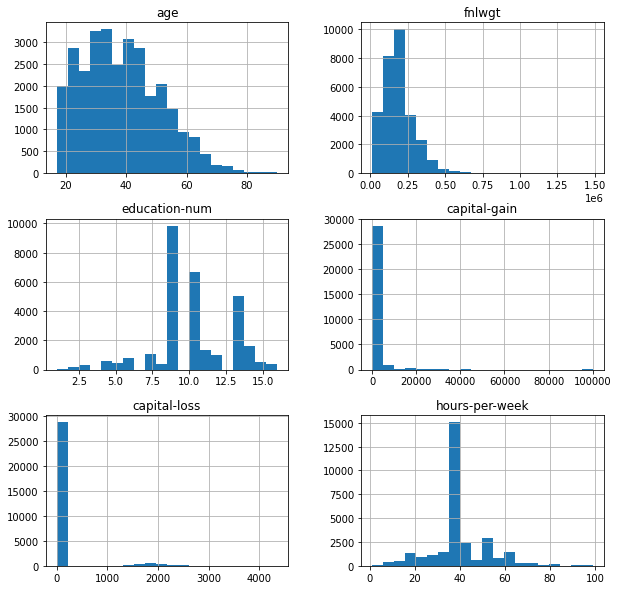

In [26]:
df.hist(figsize=(10,10), bins=20)

In [27]:
del df['capital-gain']
del df['capital-loss']

#### 1.6 - Summarizing the data

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,Continent,income
0,39,Govern,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,North_America,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,13,North_America,<=50K
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,White,Male,40,North_America,<=50K
3,53,Private,234721,Elementary,7,Married,Handlers-cleaners,Black,Male,40,North_America,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,40,Central_America,<=50K


# 

### Part 2 - Exploratory Data Analysis


This part will focus on the exploratory data analysis through visualization of the categorical variables compared to the income variable, as well as the relationship among the numerical variables.

#### 2.1 - Categorical variables

##### 2.1.1 - Income distribution

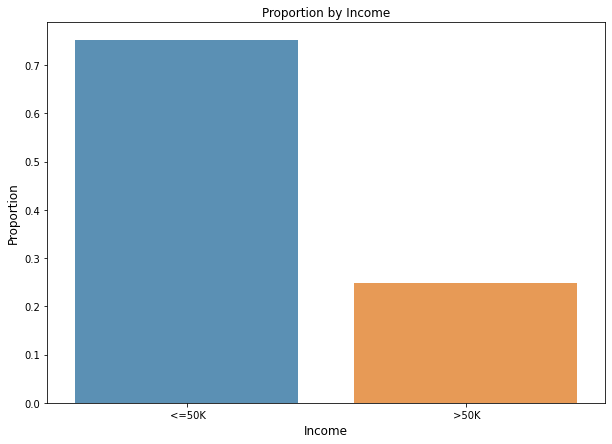

In [29]:
income_prop  = df['income'].value_counts(normalize=True)
plt.figure(figsize=(10,7))
sns.barplot(income_prop.index, income_prop.values, alpha=0.8)
plt.title('Proportion by Income')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Income', fontsize=12)
plt.show()

##### 2.1.2 - Income vs Sex

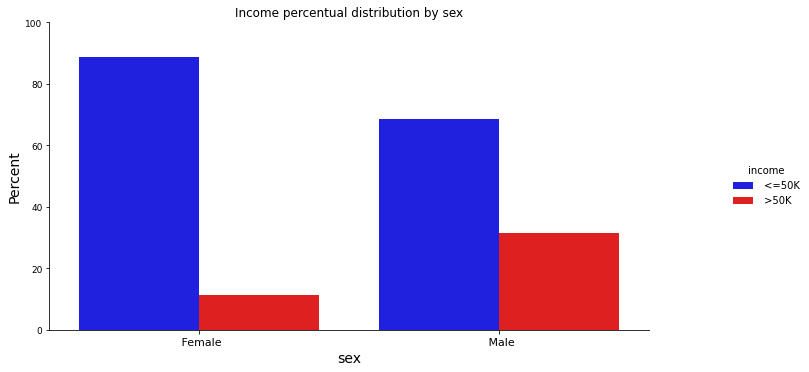

In [30]:
x,y = 'sex', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["blue", "red"])
.set(title = 'Income percentual distribution by sex')
.set_xticklabels(rotation = 0, fontsize = 11)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.3 - Income vs Education

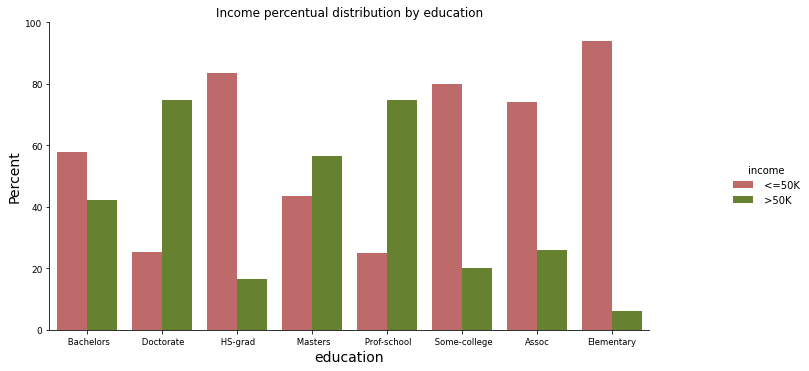

In [31]:
x,y = 'education', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["indianred", "olivedrab"])
.set(title = 'Income percentual distribution by education')
.set_xticklabels(rotation = 0, fontsize = 8.5)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.4 - Income vs Stratified Age

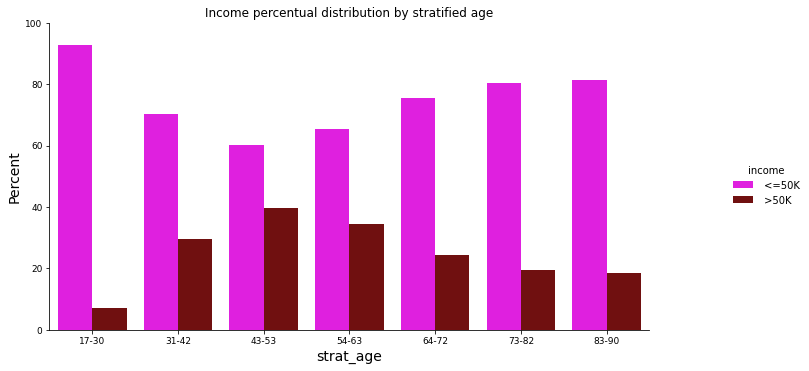

In [32]:
df['strat_age'] = pd.cut(df['age'], [17,30,42,53,63,72,82,90], 
                         labels=["17-30", "31-42", "43-53", "54-63", "64-72", "73-82", "83-90"],
                        )

x,y = 'strat_age', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["magenta", "maroon"])
.set(title = 'Income percentual distribution by stratified age')
.set_xticklabels(rotation = 0, fontsize = 9)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

# Removing strat_age variable to return the dataframe to original form
del df['strat_age']


##### 2.1.5 - Income vs Marital-Status

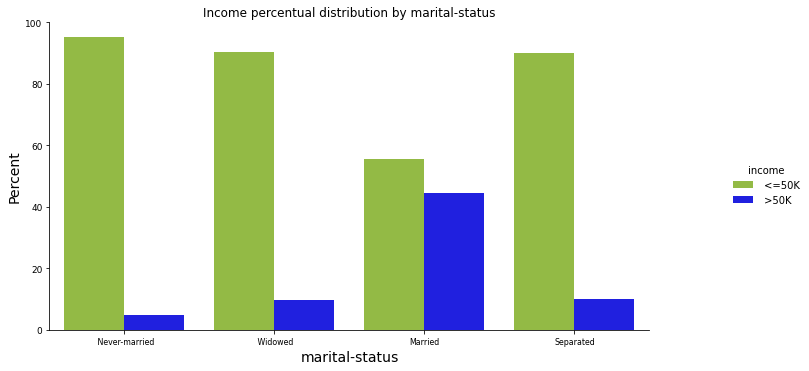

In [33]:
x,y = 'marital-status', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["yellowgreen", "blue"])
.set(title = 'Income percentual distribution by marital-status')
.set_xticklabels(rotation = 0, fontsize = 7.9)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.6 - Income vs Continent

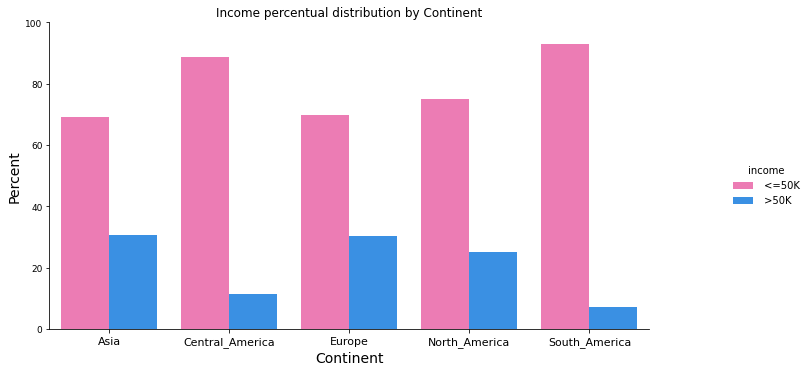

In [34]:
x,y = 'Continent', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["hotpink", "dodgerblue"])
.set(title = 'Income percentual distribution by Continent')
.set_xticklabels(rotation = 0, fontsize = 11)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.7 - Income vs Race

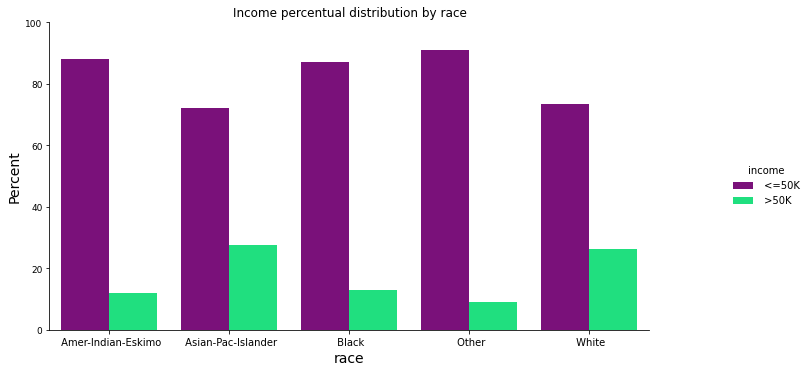

In [35]:
x,y = 'race', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["darkmagenta", "springgreen"])
.set(title = 'Income percentual distribution by race')
.set_xticklabels(rotation = 0, fontsize = 10)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.8 - Income vs Occupation

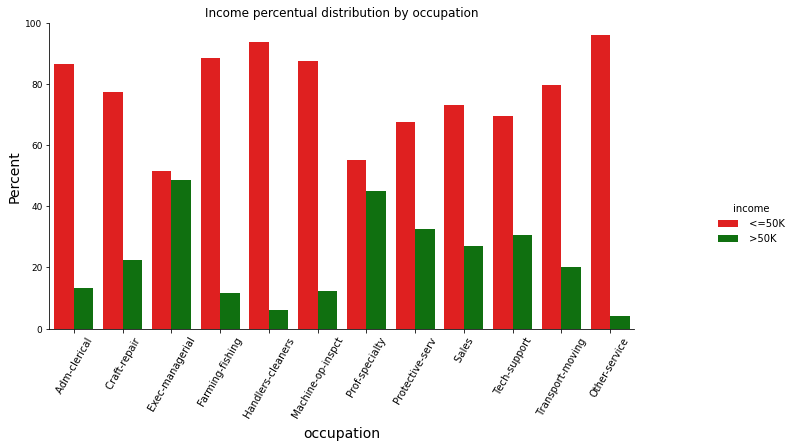

In [36]:
x,y = 'occupation', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["red", "green"])
.set(title = 'Income percentual distribution by occupation')
.set_xticklabels(rotation = 60, fontsize = 10)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

##### 2.1.9 - Income vs Work Class

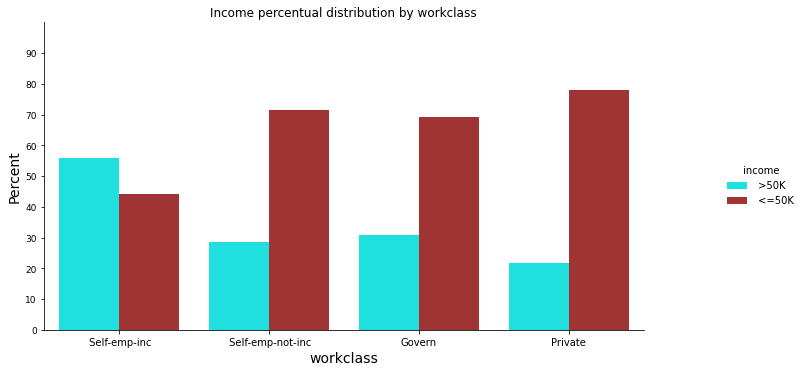

In [37]:
x,y = 'workclass', 'income'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x, y='Percent', hue=y, kind='bar', palette=["aqua", "firebrick"])
.set(title = 'Income percentual distribution by workclass')
.set_xticklabels(rotation = 0, fontsize = 10)
.set_yticklabels(rotation = 0, fontsize = 9)
.set_xlabels(fontsize = 14)
.set_ylabels(fontsize = 14)
.set(ylim=(0, 100))
.fig.set_size_inches(12, 5)
)

#### 2.2 - Correlation among numerical variables
As verified on the correlation matrix below there is no colinearity between the numerical variables.

In [38]:
df.corr()

,age,fnlwgt,education-num,hours-per-week
age,1.000000,-0.076279,0.043203,0.101348
fnlwgt,-0.076279,1.000000,-0.045199,-0.023033
education-num,0.043203,-0.045199,1.000000,0.152842
hours-per-week,0.101348,-0.023033,0.152842,1.000000


# 

### Part 3 - Building the Machine Learning Model

In this last part will be formulated the machine learning model over the cleaned and transformed data performed in the previous parts, applying all the main processes involved, as splitting the data into train and test sets, one-hot encoding, standardization, cross-validation, and under-sampling to apply specifically on this study the Random Forest algorithm by the great results obtained of this model, taking in count the trade-off among performance and spent time. 

The chosen metric was the ROC AUC because summarizes the trade-off between the true-positive rate and the false-positive rate.

#### 3.1 - Data Transformation
Preparing the data to run on the Machine Learning model

##### 3.1.1 - Transforming the income variable to binary format

In [39]:
df['income'] = df['income'].str.replace('<=50K', '0')
df['income'] = df['income'].str.replace('>50K', '1')
df['income'] = df['income'].astype('int64')

In [40]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,Continent,income
0,39,Govern,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,North_America,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,13,North_America,0
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,White,Male,40,North_America,0
3,53,Private,234721,Elementary,7,Married,Handlers-cleaners,Black,Male,40,North_America,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,40,Central_America,0


##### 3.1.2 - Selecting the categorical variables to be transformed to dummies

In [41]:
categ_lst = df.loc[:, df.dtypes== object].columns.to_list()
categ_lst

['workclass',
 'education',
 'marital-status',
 'occupation',
 'race',
 'sex',
 'Continent']

In [42]:
enc = OneHotEncoder(handle_unknown='ignore')
X1 = enc.fit_transform(df[categ_lst]).toarray()

In [43]:
len(X1), X1.shape

(30139, (30139, 41))

##### 3.1.3 - Selecting the numerical variables for values standardization, except the output variable (income)

In [44]:
numer_lst = df.select_dtypes(include=np.number).columns.to_list()
numer_lst = numer_lst[:4]
numer_lst

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [45]:
scaler = StandardScaler()
X2 = scaler.fit_transform(df[numer_lst])

In [46]:
len(X2), X2.shape

(30139, (30139, 4))

##### 3.1.4 - Concatenating the input variables and defining them as X

In [47]:
X = np.concatenate((X1, X2), axis=1)

In [48]:
len(X), X.shape

(30139, (30139, 45))

##### 3.1.5 - Transforming X to dataframe
Transforming X to dataframe which will be used on the next steps to display on the Random Forest model, the most important variables

In [49]:
X1_df = pd.DataFrame(X1)
X1_df.columns = enc.get_feature_names(categ_lst)
X2_df = pd.DataFrame(X2, columns=numer_lst)
X_df = X1_df.join(X2_df)
X_df.head()

,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_Govern,workclass_Private,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Prof-school,education_ Some-college,...,Continent_Asia,Continent_Central_America,Continent_Europe,Continent_North_America,Continent_South_America,Continent_nan,age,fnlwgt,education-num,hours-per-week
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.042516,-1.062676,1.128996,-0.078031
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.880215,-1.007829,1.128996,-2.332060
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.033639,0.244669,-0.440434,-0.078031
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.108678,0.425206,-1.225149,-0.078031
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.795183,1.406572,1.128996,-0.078031


##### 3.1.6 - Defining the output variable as y

In [50]:
y = df['income'].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
len(y), y.shape

(30139, (30139,))

#### 3.2 - Training and testing the Random Forest model with balancing and cross-validation
Applying Random Forest model with under balancing to the output classification variable, and also with cross-validation to prevent overfitting of the data, as well representing the results on a ROC_AUC methodology.

In [52]:
rus = RandomUnderSampler(replacement=False)
X_res, y_res = rus.fit_resample(X, y)

In [53]:
round(cross_val_score(RandomForestClassifier(n_estimators=500), X_res, y_res, cv=5, scoring='roc_auc').mean(), 3)

0.87

#### 3.3 - Displaying the most important variables
According to the Random Forest model, the plot below shows the most important variables

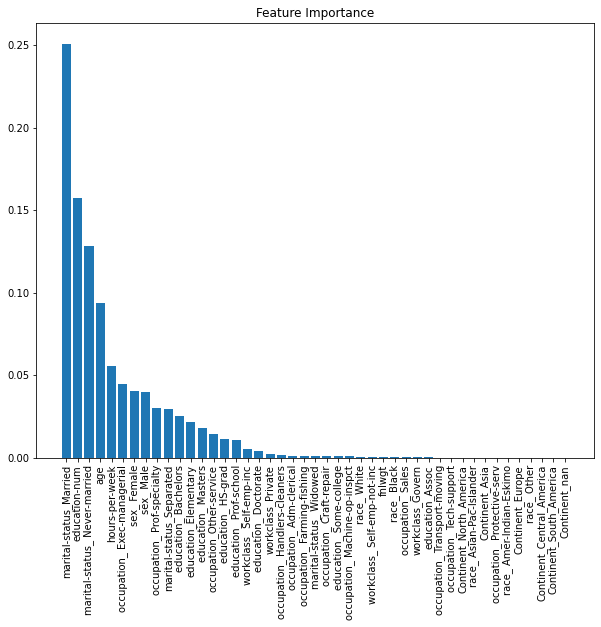

In [54]:
rf_model = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, max_depth=4)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.bar(range(X_df.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_df.shape[1]), X_df.columns[sorted_indices], rotation=90)
#plt.tight_layout()
plt.show()

# 

### Conclusion
The aim of the study was to demonstrate to the reader some of the main techniques involved in Data Science, from the import, processing, and visualization of data, as well as the application of a machine processing model (Random Forest) in the construction of the predictive model in the forecasting of whether income exceeds $50K/yr or not.

Regarding the predictive model, also could be applied the most diverse types of machine learning models with their respective hyperparameter configurations in order to make the model as efficient as possible, but were not used at this time to simplify the study and concentrate on the main scopes.

However, the result of the predictive model, at least in my point of view, proved to be quite satisfactory, with a high level of accuracy, that could be useful in real cases.

# 